# **Project Brief**
The Non Seasonal Data we chose to study was the Unemployment Rate in Ireland. We know that this data is not seasonal because the rate of unemployment doesn't fluctuate depending on the season but rather is affected by other factors such as pandemics, crisis and other disasters. Unlike our weather data set which is data dependent on the season for drastic change. The reason we decided to choose this topic for our non seasonal data was because we are interested in what factors could potentially affect our future employment and find out through statistics how badly it could affect us. This has been an interesting topic due to events such as Covid-19 majorly affecting peoples jobs and employment as it lead to a large amount of redundancy and people losing their careers. The purpose of this forecast is to highlight the devastating effect disasters have on unemployment rates. Our source for this data set came from Central Statistics Office which is a trustworthy source for Irish statistics based in Cork. 

Source:
https://data.cso.ie/

# **Unseasonal data set**
This project includes
* Retrieving and plotting datasets
* Augmented Dickey-Fuller Test
* Forecasting of $ARIMA (p, q, d)$ Model
* $Train$ and $Test$


# Project Details
Upload 'Time series graph.csv' file

Create figures folder to upload graphs


In this project i used the $ARIMA$ model as there is no seasonality in this dataset. The following equation is the general process to the $ARIMA (p, q, d)$ Model:
$$
\Large y'_t = C + \phi_1 y'_{t–1} +⋅⋅⋅ + \phi_p y'_{t–p} + \theta_1 \epsilon'_{t–1} +⋅⋅⋅+ \theta_q \epsilon'_{t–q} + \theta_t
$$

I used naive seasonal to identify statistical patterns and predict future statistics. I compared the performance of these models using Mean Absolute Percentage Error (MAPE) to determine which one fit the time series data best. I decided to use $ARIMA$ model for this because i already knew there was no seasonality but I could've easily used $SARIMA$ and test for seasonality then carried on as usual. Naive sesasonal ended up having a more better MAPE(%) meaning there may have been a better model to use for this data. This might be due to the fact that Covid was a main factor during 2020 towards unemployment and affected how the data was read. Another solution to this problem would be to have a bigger dataset. I could've also used a $VAR$ model to compare the statistics of Covid to umemployment to test my hypothesis.

In conclusion I have learned the importance of time series models when it comes to predicting future outcomes. This is an extremely beneficial information tool when used correctly.






In [24]:
#import what is neccesary
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from pandas import read_csv
from typing import Union


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data_url = 'Time series graph.csv'
df = pd.read_csv(data_url, squeeze=True)


df.head()

,Date,Unemployment Rate(%)
0,Nov-19,4.7
1,Dec-19,4.8
2,Jan-20,4.8
3,Feb-20,4.8
4,Mar-20,4.9


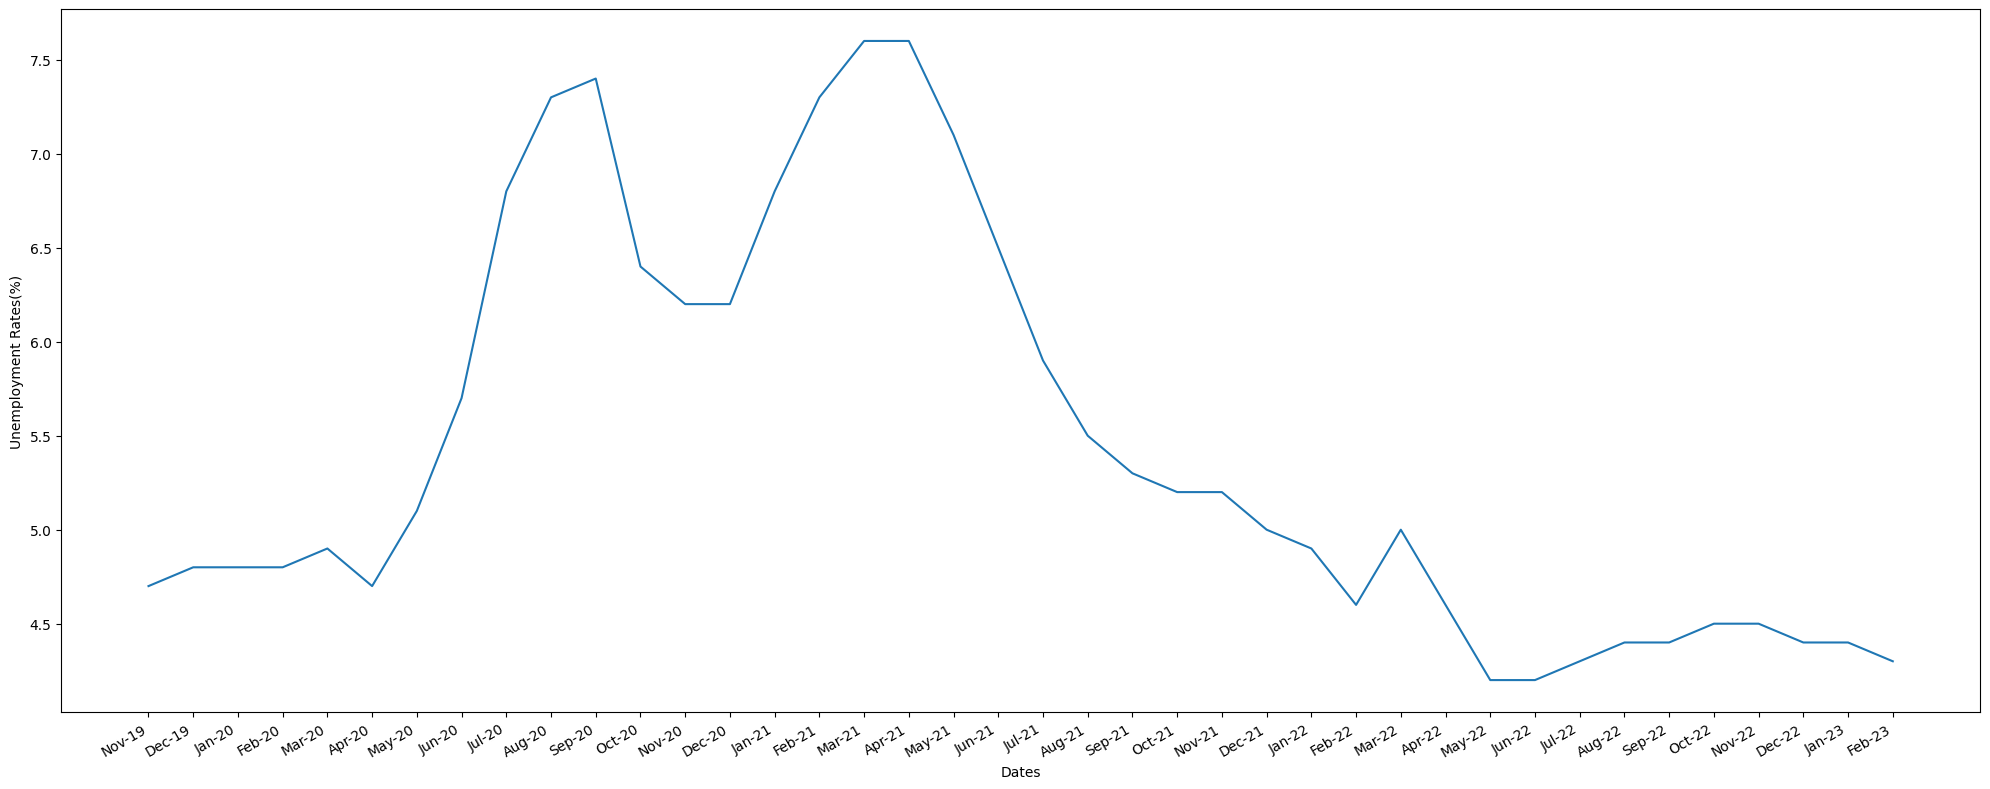

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'],df['Unemployment Rate(%)'])
# Setting x-axis label
ax.set_xlabel('Dates')

# Setting y-axis label
ax.set_ylabel('Unemployment Rates(%)')



fig.autofmt_xdate()
plt.tight_layout()
#Save graph into figures
plt.savefig('figures/NonSeasonal_peixeiro.png', dpi=300)





In [9]:
#Augmented Dickey-Fuller Test
x = df.values
ad_fuller_result = adfuller(df['Unemployment Rate(%)'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: -0.8821488985669564
p-value: 0.7937941879664827


p-value is not < 0.05 so we apply adfuller again


In [10]:
df_diff = np.diff(df['Unemployment Rate(%)'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.406539395979963
p-value: 0.010737953877460292


p-value is now < than 0.05 so we can continue

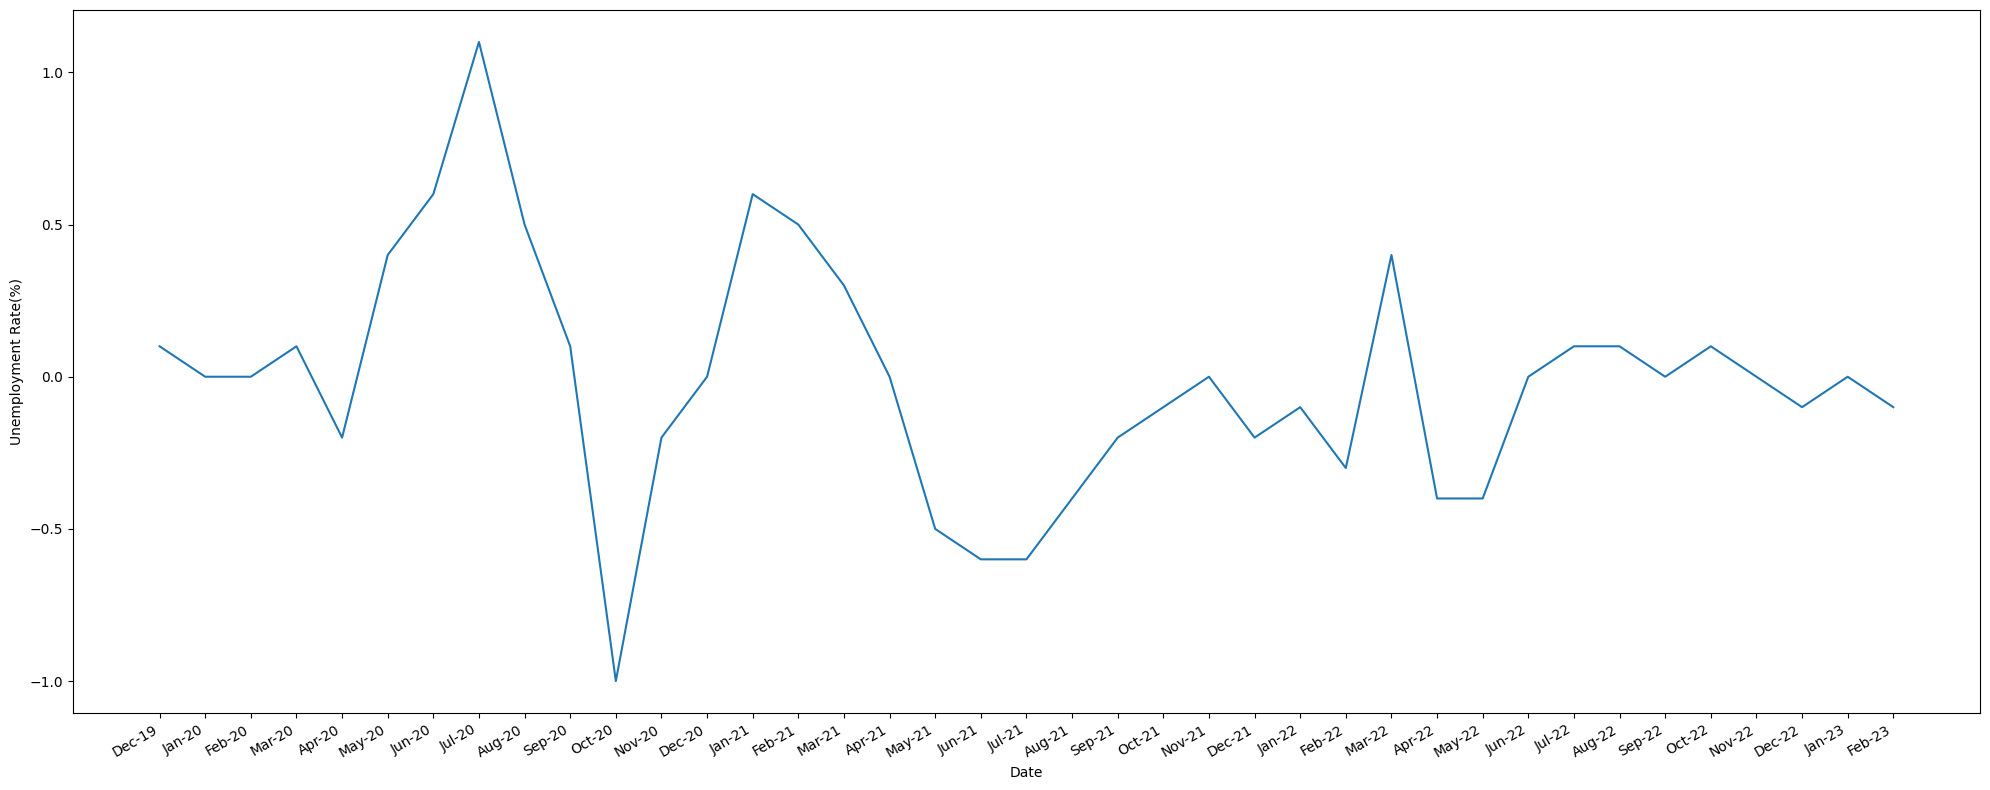

In [23]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'][1:], df_diff)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate(%)')

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/NonSeasonal1_peixeiro.png', dpi=300)

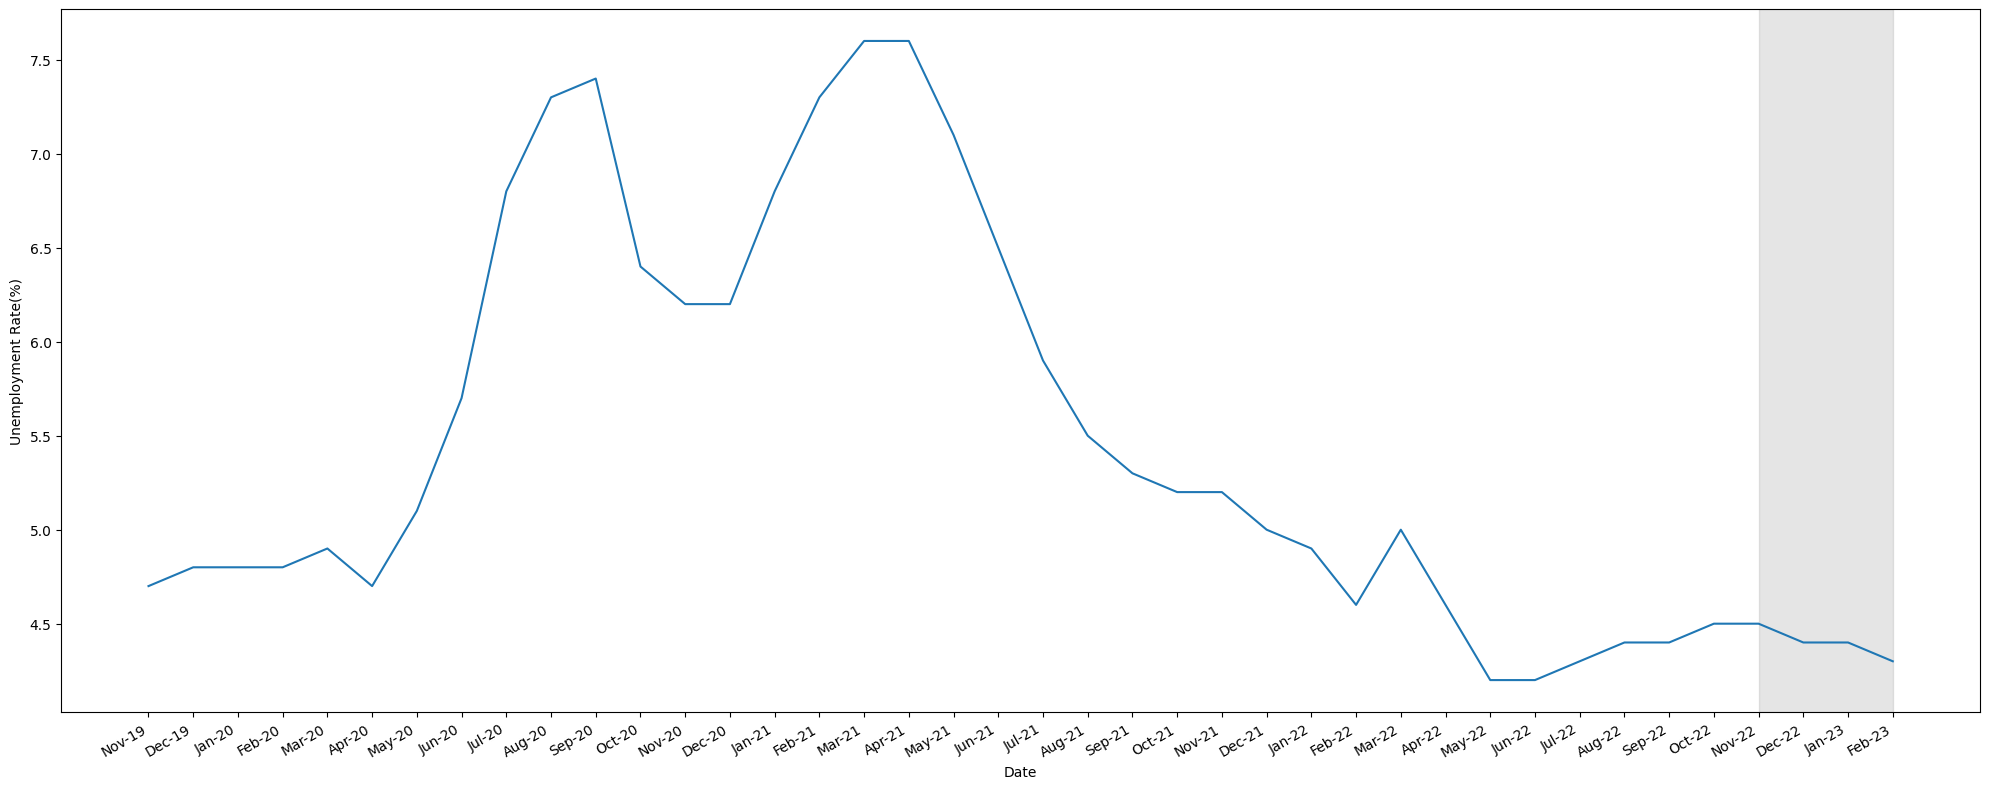

In [41]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(df['Date'], df['Unemployment Rate(%)'])
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate(%)')
ax.axvspan(36, 39, color='#808080', alpha=0.2)



fig.autofmt_xdate()
plt.tight_layout()

# Run the $ARIMA$ function

In [12]:
def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [25]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 2

order_list = list(product(ps, qs))
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [26]:
#train the data
train = df['Unemployment Rate(%)'][:-4]

result_df = optimize_ARIMA(train, order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(3, 1)",28.122066
1,"(0, 3)",29.262071
2,"(3, 2)",30.121030
3,"(3, 3)",30.478476
4,"(1, 3)",31.259983
5,"(3, 0)",32.680048
6,"(2, 3)",33.115956
7,"(1, 2)",35.007073
8,"(2, 2)",35.823828
9,"(0, 0)",36.180050


In [27]:
model = SARIMAX(train, order=(3,2,3), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     Unemployment Rate(%)   No. Observations:                   36
Model:                 SARIMAX(3, 2, 3)   Log Likelihood                  -8.239
Date:                  Mon, 08 May 2023   AIC                             30.478
Time:                          14:24:20   BIC                             41.163
Sample:                               0   HQIC                            34.122
                                   - 36                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5771      0.540      1.068      0.285      -0.482       1.636
ar.L2          0.2592      0.633      0.409      0.682      -0.982       1.500
ar.L3         -0.7030      0.371    

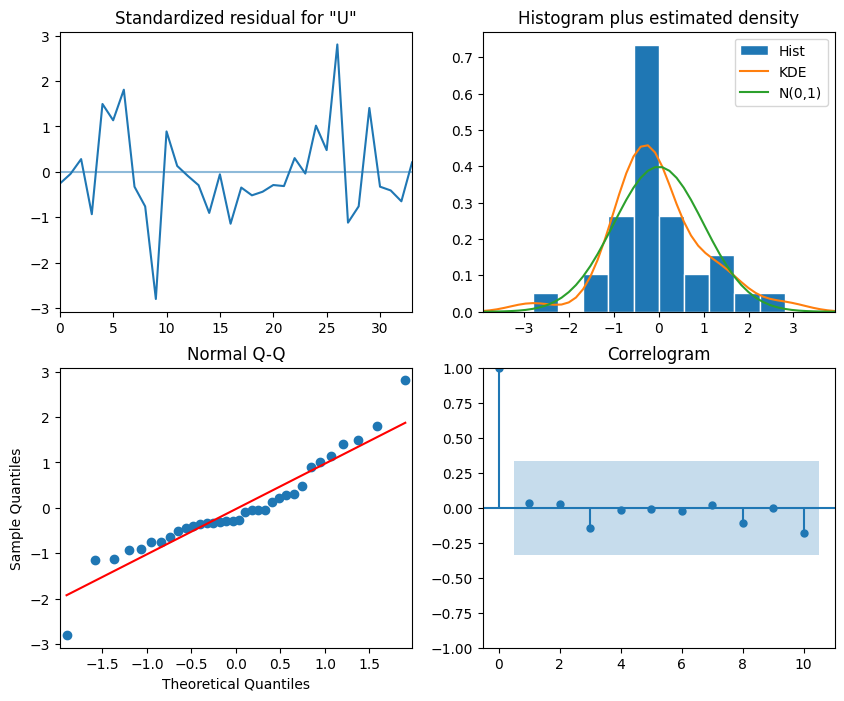

In [28]:
model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/NonSeasonal2_peixeiro.png', dpi=300)


In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox


residuals = model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))



,lb_stat,lb_pvalue
1,4.371428,0.036546
2,4.376287,0.112125
3,4.409214,0.220533
4,4.466974,0.346482
5,4.826851,0.437375
6,4.937910,0.551801
7,4.947905,0.666321
8,5.312073,0.723760
9,5.313291,0.806188
10,5.320954,0.868733


In [30]:
test = df.iloc[-4:]

test['naive_seasonal'] = df['Unemployment Rate(%)'].iloc[35:39].values
test

,Date,Unemployment Rate(%),naive_seasonal
36,Nov-22,4.5,4.5
37,Dec-22,4.4,4.5
38,Jan-23,4.4,4.4
39,Feb-23,4.3,4.4


In [40]:
ARIMA_pred = model_fit.get_prediction(36, 39).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Date,Unemployment Rate(%),naive_seasonal,ARIMA_pred
36,Nov-22,4.5,4.5,4.518867
37,Dec-22,4.4,4.5,4.485889
38,Jan-23,4.4,4.4,4.362623
39,Feb-23,4.3,4.4,4.230859


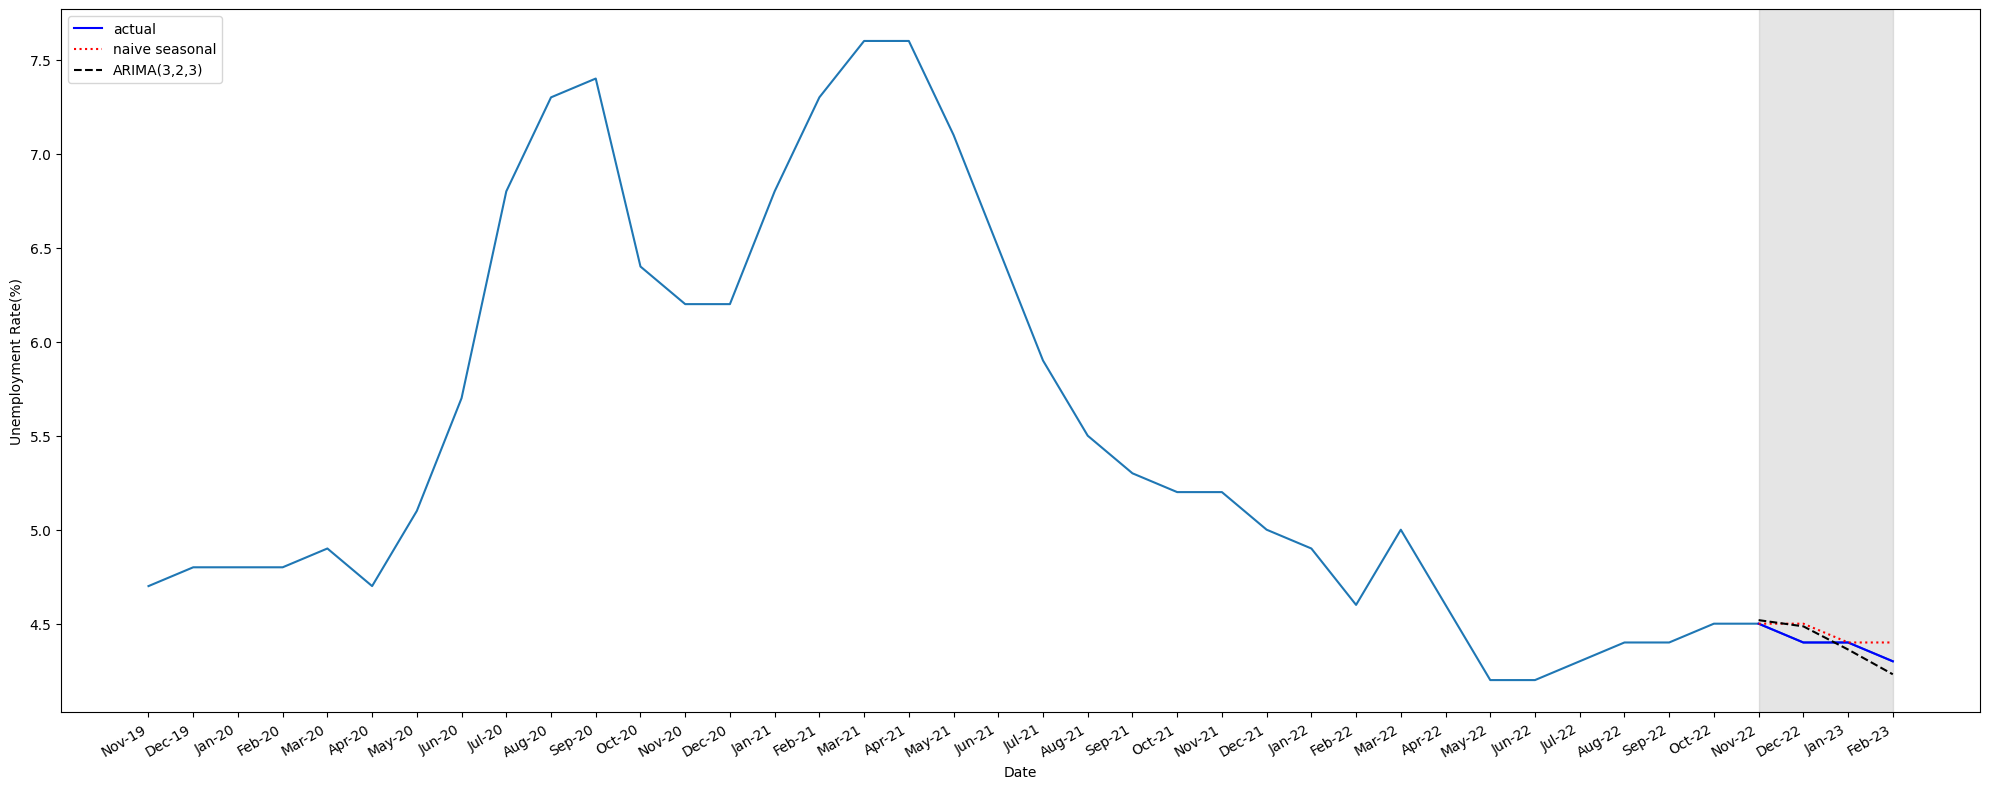

In [45]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(df['Date'], df['Unemployment Rate(%)'])
ax.plot(test['Unemployment Rate(%)'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(3,2,3)')

ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate(%)')
ax.axvspan(36, 39, color='#808080', alpha=0.2)

ax.legend(loc=2)


fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/UnSeasonal3_peixeiro.png', dpi=300)

In [50]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_naive_seasonal = mape(test['Unemployment Rate(%)'], test['naive_seasonal'])*100
mape_ARIMA = mape(test['Unemployment Rate(%)'], test['ARIMA_pred'])*100

print('MAPE Naive:',"%.2f" % (mape_naive_seasonal),'%')
print('MAPE ARIMA:',"%.2f" % (mape_ARIMA),'%')

MAPE Naive: 1.15 %
MAPE ARIMA: 1.21 %


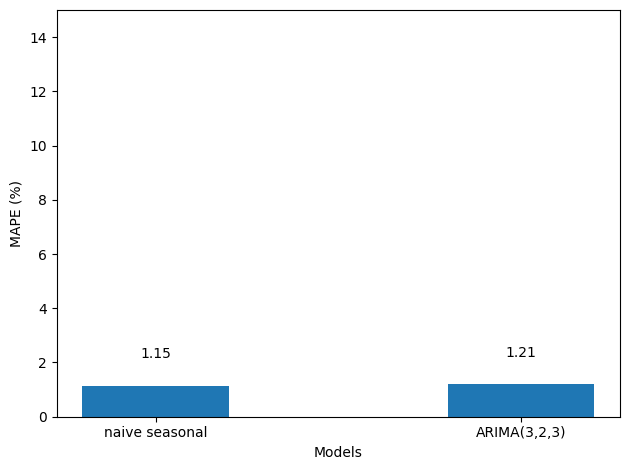

In [51]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(3,2,3)']
y = [mape_naive_seasonal, mape_ARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

plt.savefig('figures/UnSeasonal4_peixeiro.png', dpi=300)